In [16]:
import numpy as np
from scipy.stats import norm

In [14]:
def arithmetic_asian_fx_call_price(S0, K, rd, rf, T, sigma, N, M):
    dt = T / M
    payoff_sum = 0
    
    for _ in range(N):
        S_path = np.zeros(M + 1)
        S_path[0] = S0
        
        for t in range(1, M + 1):
            Z = np.random.normal()
            S_path[t] = S_path[t - 1] * np.exp((rd - rf - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
        
        S_avg = np.mean(S_path)
        payoff_sum += max(S_avg - K, 0)
    
    call_price = np.exp(-rd * T) * (payoff_sum / N)
    return call_price

# Parameters
S0 = 83.5839     # Initial stock price
K = 84.16      # Strike price
T =0.508333333        # Time to maturity (1 year)
rd = 0.06574    # Domestic risk-free interest rate
rf = 0.05115    # Foreign risk-free interest rate
sigma = 0.02837
N = 50000    # Number of simulation paths
M = 126      # Number of time steps

call_price = arithmetic_asian_fx_call_price(S0, K, rd, rf, T, sigma, N, M)
print(f"Arithmetic Asian FX Call Option Price: {call_price*100/S0:.4f}")


Arithmetic Asian FX Call Option Price: 0.3157


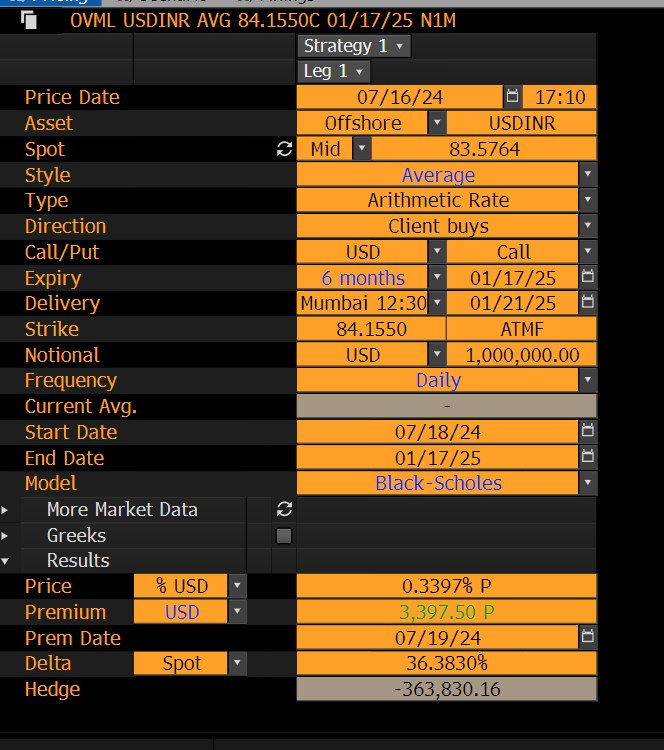

In [15]:
import numpy as np
from scipy.stats import norm
def black_scholes_fx(S0, K, T, rd, rf, sigma, option_type='call'):
    d1 = (np.log(S0 / K) + (rd - rf + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        price = S0 * np.exp(-rf * T) * norm.cdf(d1) - K * np.exp(-rd * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * np.exp(-rd * T) * norm.cdf(-d2) - S0 * np.exp(-rf * T) * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    
    return price

def geometric_asian_option_price_fx(S0, K, T, rd, rf, sigma, n, option_type='call'):
    """
    Calculate the price of a geometric average Asian option using the closed-form solution for FX options.

    Parameters:
    S0 (float): Initial stock price
    K (float): Strike price
    T (float): Time to maturity (in years)
    rd (float): Domestic risk-free interest rate
    rf (float): Foreign risk-free interest rate
    sigma (float): Volatility
    n (int): Number of observations
    option_type (str): 'call' for call option, 'put' for put option

    Returns:
    float: Price of the geometric average Asian option
    """
    
    sigma_adj = sigma * np.sqrt((2 * n + 1) / (6 * (n + 1)))
    r_adj = rd - rf - (sigma ** 2) / 12
    
    d1 = (np.log(S0 / K) + ((r_adj + rf) + 0.5 * sigma_adj ** 2) * T) / (sigma_adj * np.sqrt(T))
    d2 = d1 - sigma_adj * np.sqrt(T)
    
    if option_type == 'call':
        price = np.exp(-rd * T) * (S0 * np.exp((r_adj + rf) * T) * norm.cdf(d1) - K * norm.cdf(d2))
    elif option_type == 'put':
        price = np.exp(-rd * T) * (K * norm.cdf(-d2) - S0 * np.exp((r_adj + rf) * T) * norm.cdf(-d1))
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    
    return price

# Parameters
S0 = 83.5839     # Initial stock price
K = 84.16      # Strike price
T = 0.5        # Time to maturity (1 year)
rd = 0.06574    # Domestic risk-free interest rate
rf = 0.05115    # Foreign risk-free interest rate
sigma = 0.02837  # Volatility
# set no. of observations to daily
n = 252*T

# Calculate call and put prices using Black-Scholes-Merton model
bsm_call_price = black_scholes_fx(S0, K, T, rd, rf, sigma, option_type='call')
bsm_put_price = black_scholes_fx(S0, K, T, rd, rf, sigma, option_type='put')

# Calculate call and put prices using geometric average Asian option model
asian_call_price = geometric_asian_option_price_fx(S0, K, T, rd, rf, sigma, n, option_type='call')
asian_put_price = geometric_asian_option_price_fx(S0, K, T, rd, rf, sigma, n, option_type='put')

print(f"Black-Scholes European Call Option Price: {bsm_call_price*100/S0:.2f}")
print(f"Black-Scholes European Put Option Price: {bsm_put_price*100/S0:.2f}")
print(f"Geometric Asian Call Option Price: {asian_call_price*100/S0:.2f}")
print(f"Geometric Asian Put Option Price: {asian_put_price*100/S0:.2f}")

Black-Scholes European Call Option Price: 0.80
Black-Scholes European Put Option Price: 0.76
Geometric Asian Call Option Price: 2.57
Geometric Asian Put Option Price: 0.00
